In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

## Creating a decision tree

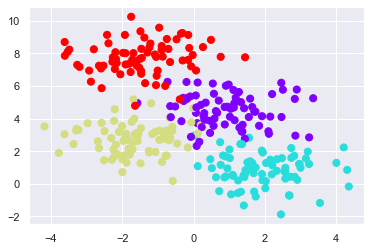

In [2]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=300, centers=4,
                 random_state=0, cluster_std=1.0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow');


In [5]:
from sklearn.tree  import DecisionTreeClassifier
tree = DecisionTreeClassifier().fit(X,y)

In [8]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
                   ax = ax or plt.gca()
 # Plot the training points
                   ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
                   clim=(y.min(), y.max()), zorder=3)
                   ax.axis('tight')
                   ax.axis('off')
                   xlim = ax.get_xlim()
                   ylim = ax.get_ylim()
 # fit the estimator
                   model.fit(X, y)
                   xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                   np.linspace(*ylim, num=200))
                   Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
 # Create a color plot with the results
                   n_classes = len(np.unique(y))
                   contours = ax.contourf(xx, yy, Z, alpha=0.3,
                   levels=np.arange(n_classes + 1) - 0.5,
                   cmap=cmap, clim=(y.min(), y.max()),
                   zorder=1)
                   ax.set(xlim=xlim, ylim=ylim)

C:\Users\91808\AppData\Local\Temp/ipykernel_2836/3383441991.py:17: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


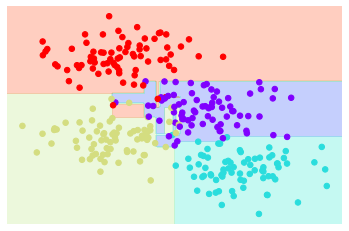

In [9]:
visualize_classifier(DecisionTreeClassifier(), X, y)


In [11]:
from sklearn.ensemble import BaggingClassifier

In [12]:
bag = BaggingClassifier(tree , n_estimators =100, max_samples =0.8 ,random_state =1)

In [13]:
bag.fit(X,y)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=0.8,
                  n_estimators=100, random_state=1)

C:\Users\91808\AppData\Local\Temp/ipykernel_2836/3383441991.py:17: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


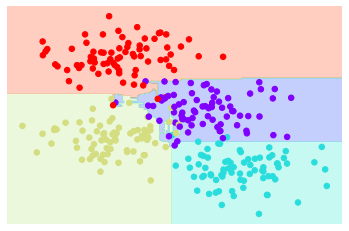

In [14]:
visualize_classifier(bag, X, y)

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
model = RandomForestClassifier(n_estimators =100, random_state =0)

In [27]:
model.fit(X,y)

RandomForestClassifier(random_state=0)

C:\Users\91808\AppData\Local\Temp/ipykernel_2836/3383441991.py:17: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


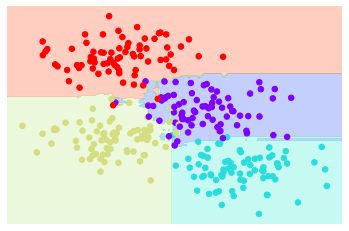

In [30]:
visualize_classifier(model ,X,y);
#visualize_classifier

## Random Forest Regression

In [31]:
rng = np.random.RandomState(42)

x = 10 * rng.rand(200)

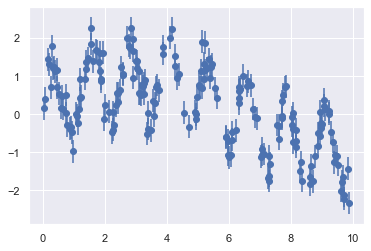

In [33]:
def model(x, sigma=0.3):
     fast_oscillation = np.sin(5 * x)
     slow_oscillation = np.sin(0.5 * x)
     noise = sigma * rng.randn(len(x))
     return slow_oscillation + fast_oscillation + noise
y = model(x)
plt.errorbar(x, y, 0.3, fmt='o');